In [1]:
import pandas
import matplotlib.pyplot

import espn_fantasy_rugby.team_selector

In [2]:
features = ['OPP', 'POS']
target = 'MDP'

espn_data = pandas.concat(
    pandas.read_excel(
        '../data/espn_rugby_data.xlsx',
        sheet_name=None
    ),
    ignore_index=True
)

In [3]:
first_round_players = [
    'A Dell',
    'D Bamba',
    'J Poirot',
    'F Lambey',
    'J Gray',
    'A Steyn',
    'S O’Brien',
    'P O’Mahony',
    'B Youngs',
    'J Hayward',
    'H Slade',
    'M Tuilagi',
    'E Padovani',
    'S Maitland',
    'J Adams'
]

In [4]:
initial_team = espn_fantasy_rugby.team_selector.get_initial_team(first_round_players, espn_data)

In [5]:
team_each_round = espn_fantasy_rugby.team_selector.simulate_tournament(espn_data, initial_team, features, target)

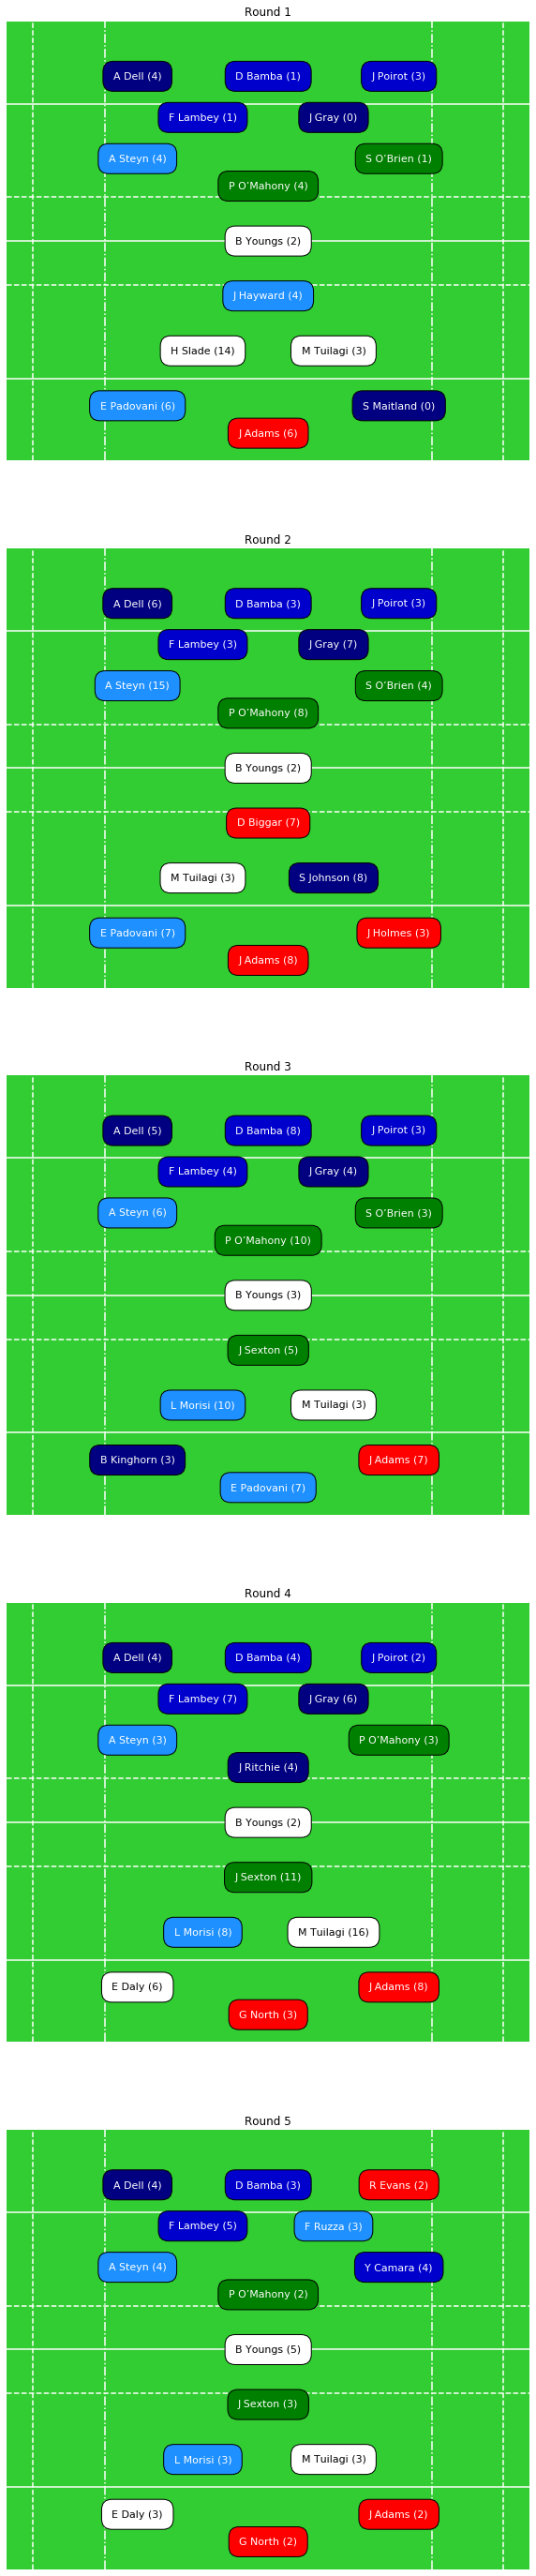

In [7]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,50), nrows=5, ncols=1)
for tournament_round in [1,2,3,4,5]:
    team_round = team_each_round[team_each_round['ROUND']==tournament_round]
    espn_fantasy_rugby.team_selector.show_team(team_round, ax[tournament_round-1])
    ax[tournament_round-1].set_title('Round {}'.format(tournament_round))
matplotlib.pyplot.show()